In [1]:
install.packages("randomForest")
install.packages("multcomp")
library(multcomp)
install.packages("party")
library(party)
library(randomForest)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: ‘TH.data’

The following object is masked from ‘package:MASS’:

    geyser

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: grid
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [9]:
trainData <- read.csv(file='./IrisTraining_corrupted1.csv')
testData <- read.csv(file='./IrisTesting.csv')

print(head(trainData))
print(head(testData))

  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm     Species
1           7.1          5.5           1.7          0.3 Iris-setosa
2           4.9          3.0           1.4          0.2 Iris-setosa
3           4.7          3.2           1.3          0.2 Iris-setosa
4           4.6          3.1           1.5          0.2 Iris-setosa
5           5.0          3.6           1.4          0.2 Iris-setosa
6           5.4          3.9           1.7          0.4 Iris-setosa
  SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm     Species
1           5.0          3.5           1.3          0.3 Iris-setosa
2           4.5          2.3           1.3          0.3 Iris-setosa
3           4.4          3.2           1.3          0.2 Iris-setosa
4           5.0          3.5           1.6          0.6 Iris-setosa
5           5.1          3.8           1.9          0.4 Iris-setosa
6           4.8          3.0           1.4          0.3 Iris-setosa


In [10]:
iris_rf <- randomForest(Species~.,data=trainData)
table(predict(iris_rf),trainData$Species)

                 
                  Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              40               0              0
  Iris-versicolor           0              36              3
  Iris-virginica            0               4             37

In [11]:
print(iris_rf)


Call:
 randomForest(formula = Species ~ ., data = trainData) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 5.83%
Confusion matrix:
                Iris-setosa Iris-versicolor Iris-virginica class.error
Iris-setosa              40               0              0       0.000
Iris-versicolor           0              36              4       0.100
Iris-virginica            0               3             37       0.075


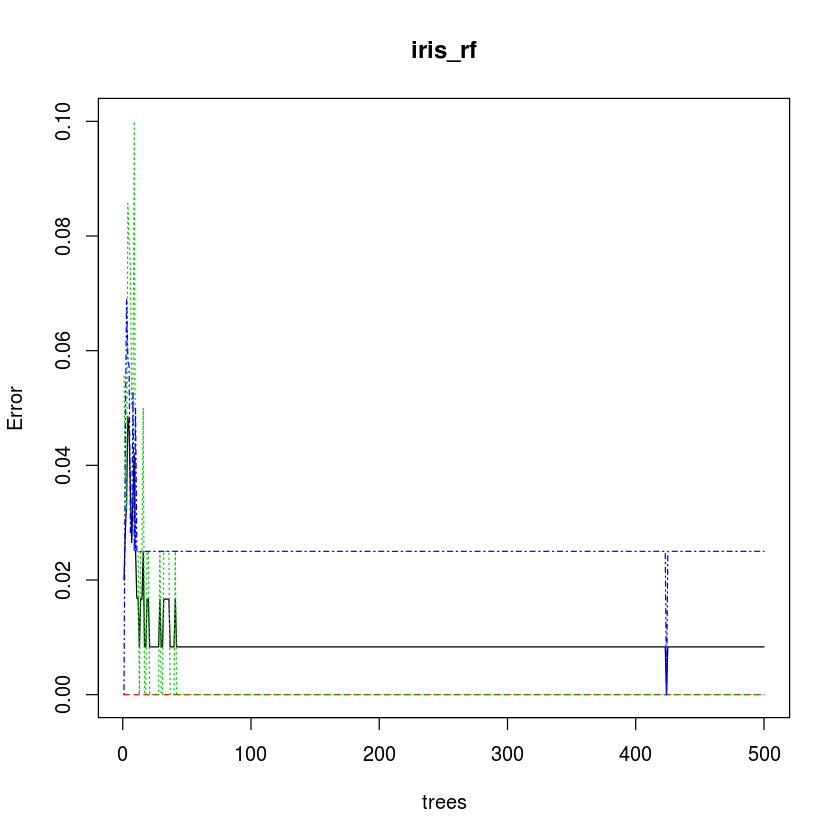

In [5]:
plot(iris_rf)

In [12]:
irisPred<-predict(iris_rf,newdata=testData)
table(irisPred, testData$Species)

                 
irisPred          Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

mtry = 2  OOB error = 5.33% 
Searching left ...
mtry = 4 	OOB error = 4% 
0.25 0.05 


Warning message in randomForest.default(x, y, mtry = mtryCur, ntree = ntreeTry, :
“invalid mtry: reset to within valid range”

mtry = 8 	OOB error = 4% 
0 0.05 
Searching right ...
mtry = 1 	OOB error = 5.33% 
-0.3333333 0.05 


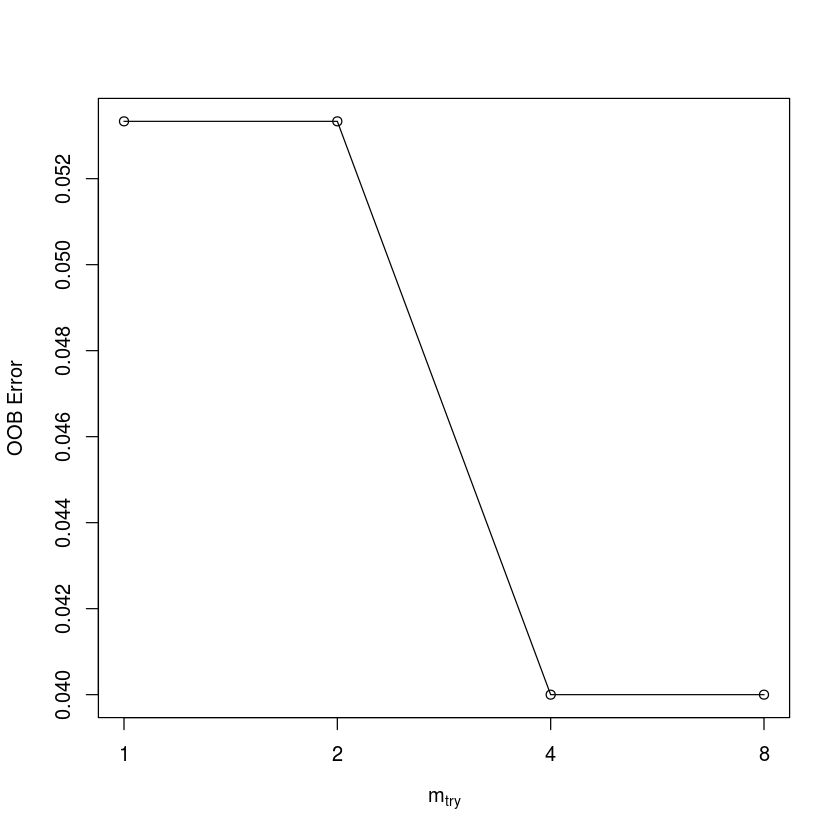

In [13]:
tune.rf <- tuneRF(iris[,-5],iris[,5], stepFactor=0.5)

In [14]:
print(tune.rf)

      mtry   OOBError
1.OOB    1 0.05333333
2.OOB    2 0.05333333
4.OOB    4 0.04000000
8.OOB    8 0.04000000


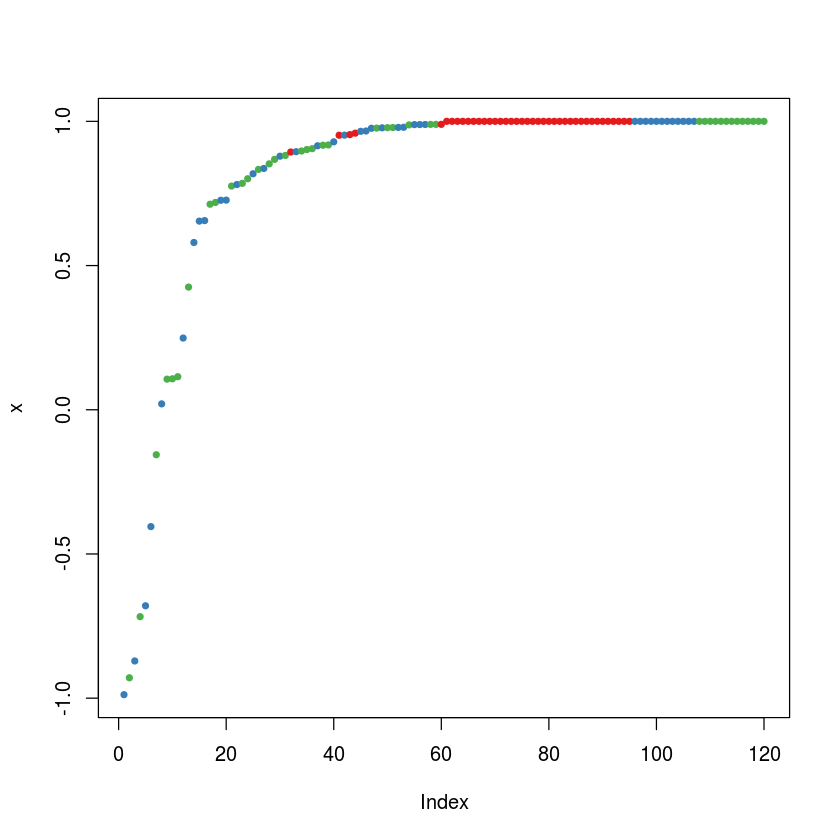

In [15]:
plot(margin(iris_rf,testData$Species))